In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Prepare dataset

#### Preprocessing (Dealing with missing data)

In [58]:
# Filling missing values with mean
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

train_df.dropna(axis=0, subset=["Survived"], inplace=True)
train_df.dropna(axis=0, subset=["Age"], inplace=True)

#### Feature Engineering (Labeling categorical data)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

train_df["Sex"] = le.fit_transform(train_df["Sex"])
test_df["Sex"] = le.fit_transform(test_df["Sex"])

#### Spliting dataset

In [60]:
# Selecting features
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

y = train_df["Survived"]

In [61]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, test_size=0.2)

#### Make predictions using Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1)
pipe_forest = make_pipeline(
  StandardScaler(),
  model_forest
)

pipe_forest.fit(X_train, y_train)

pipe_forest.score(X_valid, y_valid)

0.8321678321678322

#### Make predictions using Single Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=1)
pipe_tree = make_pipeline(
  StandardScaler(),
  model_tree
)
pipe_tree.fit(X_train, y_train)

pipe_tree.score(X_valid, y_valid)

0.7692307692307693

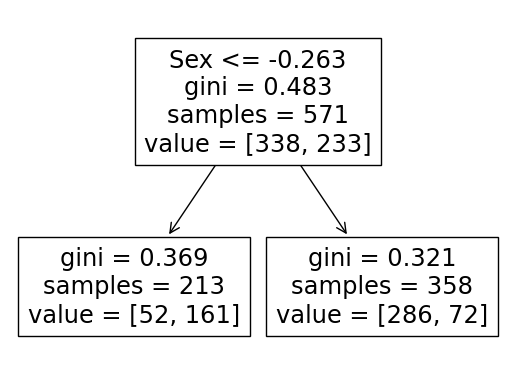

In [106]:
# Plotting Tree

# To file
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_tree,
  filled=True,
  rounded=True,
  class_names=['Died', 'Survived'],
  feature_names=features,
  out_file=None
)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

#To notebook
from sklearn import tree
tree.plot_tree(model_tree, feature_names=list(X_train.columns))
plt.show()

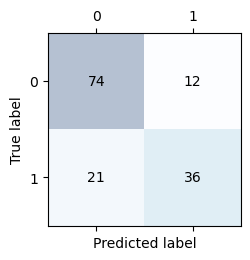

In [109]:
from sklearn.metrics import confusion_matrix

y_pred = pipe_tree.predict(X_valid)
confmat = confusion_matrix(y_true=y_valid, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i,
      s=confmat[i, j],
      va='center', ha='center'
    )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()